In [182]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import csv

In [183]:
df = pd.read_csv('the_art_of_war.csv', delimiter = '\t')
df

,",tweets;;;;;"
0,"0,""If you know the enemy &amp; know yourself, ..."
1,;;;;;
2,"-The Art of War"";;;;;"
3,"1,""Today's Italian American MLB player is Art ..."
4,"2,""@Cernovich @rramom59 You are such a drama q..."
...,...
2617,"997,""Know yourself and you will win all battle..."
2618,;;;;;
2619,"—Sun Tzu, The Art of War"";;;;;"
2620,"998,@Peterman43 The art of war;;;;;"


In [201]:
text = df[',tweets;;;;;'][0]

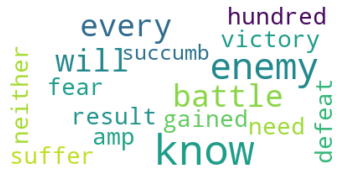

In [202]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [155]:
# Read the csv files
input_data = []
with open('the_art_of_war.csv', errors ='replace') as f:    
  for row in csv.reader(f, delimiter=',', quoting=csv.QUOTE_NONE):
    input_data += row

In [156]:
input_data 

['',
 'tweets;;;;;',
 '"0',
 '""If you know the enemy &amp"; know yourself',
 ' you need not fear the result of a hundred battles. If you know yourself but not the enemy',
 ' for every victory gained you will also suffer a defeat. If you know neither the enemy nor yourself',
 ' you will succumb in every battle.;;;;',
 ';;;;;',
 '"-The Art of War""";;;;;',
 '"1',
 '""Today\'s Italian American MLB player is Art Ceccarelli',
 ' pitched for the KC Athletics',
 ' Orioles',
 ' &amp";" Cubs in parts of 5 seasons spanning 1955â€“1960',
 ' served in the Korean War from 1950-52. only LHP to defeat Sandy Koufax in the Coliseum (1959',
 ' 10 inn) more: https://t.co/KugMN9Irvo""";;;;',
 '"2',
 '""@Cernovich @rramom59 You are such a drama queen. Have patience. ";;;;;',
 'â€œRouse him',
 ' and learn the principle of his activity or inactivity. Force him to reveal himself',
 ' so as to find out his vulnerable spots.â€�;;;;;',
 '"â€• Sun Tzu',
 ' The Art of War""";;;;;',
 '3',
 "When a person's financi

In [161]:
for s in input_data:
    s.replace("@", "")

In [166]:
input_data

['',
 'tweets;;;;;',
 '"0',
 '""If you know the enemy &amp"; know yourself',
 ' you need not fear the result of a hundred battles. If you know yourself but not the enemy',
 ' for every victory gained you will also suffer a defeat. If you know neither the enemy nor yourself',
 ' you will succumb in every battle.;;;;',
 ';;;;;',
 '"-The Art of War""";;;;;',
 '"1',
 '""Today\'s Italian American MLB player is Art Ceccarelli',
 ' pitched for the KC Athletics',
 ' Orioles',
 ' &amp";" Cubs in parts of 5 seasons spanning 1955â€“1960',
 ' served in the Korean War from 1950-52. only LHP to defeat Sandy Koufax in the Coliseum (1959',
 ' 10 inn) more: https://t.co/KugMN9Irvo""";;;;',
 '"2',
 '""@Cernovich @rramom59 You are such a drama queen. Have patience. ";;;;;',
 'â€œRouse him',
 ' and learn the principle of his activity or inactivity. Force him to reveal himself',
 ' so as to find out his vulnerable spots.â€�;;;;;',
 '"â€• Sun Tzu',
 ' The Art of War""";;;;;',
 '3',
 "When a person's financi

In [138]:
# iterate through the csv file
for val in input_data.CONTENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

SyntaxError: invalid non-printable character U+00A0 (3997492268.py, line 3)

In [139]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

SyntaxError: invalid non-printable character U+00A0 (4191390141.py, line 2)

In [140]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

SyntaxError: invalid non-printable character U+00A0 (411132526.py, line 5)